# SQL

## Data Manipulation Language (DML)

As principais cláusulas DML em SQL são:
- INSERT INTO
- UPDATE
- DELETE

### INSERIR DADOS EM UMA TABELA

Vamos inserir na coluna `descricao` da tabela `marca` os seguintes dados: Olympikus, Addidas, Mizuno, Nike, Grendene e Polo.

Cabe observar que foi necessário apenas informar os dados para a coluna `descricao`, pois a coluna `id` por possuir a _constraint_ `AUTO_INCREMENT`, não precisa ter informados os valores de `id`, eles são preenchidos automaticamente pelo SGBD.

### ATUALIZAR DADOS EM UMA TABELA

In [ ]:
-- Atualiza a data de assinatura e valor do contrato 12 da tabela contratos
UPDATE contratos
SET assinatura = '17/05/2024', valor_contrato = 84300
WHERE id_contrato = 12;

### DELETAR DADOS

### INSERIR DADOS EM UMA TABELA VIA ARQUIVO CSV

Nos exemplos a seguir, é mostrado como inerir dados na tabela `alunos`, a partir de uma tabela CSV:

**MySQL**

**SQL Server**

In [ ]:
USE exercicios;

BULK INSERT alunos
FROM 'dados_alunos2.csv'
WITH (
    CODEPAGE = '1252',         -- Código de página para Latin1 (ISO-8859-1)
    FIRSTROW = 2,              -- Iniciar da segunda linha
    ROWTERMINATOR = '\n',      -- Terminador de linha para Windows (LINUX 0x0A)
    FIELDTERMINATOR = ',',     -- Delimitador de campo como ponto e vírgula
    FIELDQUOTE = '"',          -- Caractere de citação para texto
    MAXERRORS = 0              -- Abortar a operação em caso de erros
);


**PostgreSQL**

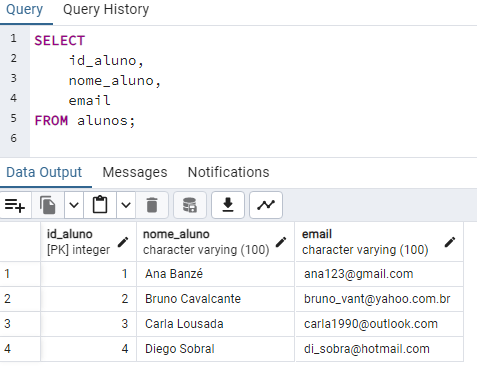

Dados da planilha CSV:

In [7]:
import pandas as pd

data = pd.read_csv('./scripts/PostgreSQL/dados_alunos.csv', encoding='latin1')

display(data)

,id_aluno,nome,email
0,6,Robson Cruz,rob.cruz@gmail.com
1,7,Maria Barbosa,mbarb12@gmail.com
2,8,João Pé de Feijão,jpe215@uol.com.br


Inserir os dados da planilha CSV na tabela `alunos`

In [ ]:
COPY alunos(nome_aluno, email)
FROM 'dados_alunos.csv'
WITH
	DELIMITER ','
    ENCODING 'latin1'
	CSV HEADER;

In [ ]:
SELECT
	id_aluno,
	nome_aluno,
	email
FROM alunos;

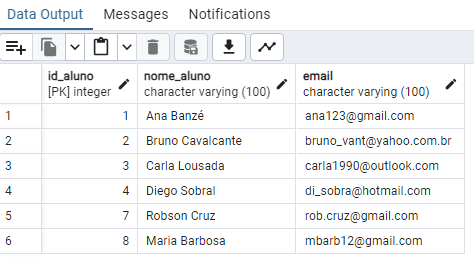

Por padrão o PostgreSQL ler e insere os dados com a codificação padrão de instalação, geralmente UT-8. Para saber a codificação em uso por padrão no PostgreSQL você pode usar o comando `SHOW`:

In [ ]:
SHOW SERVER_ENCODING;


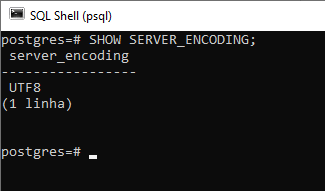

No caso da tabela pertencer a uma base de dados que foi importado, pode ser que contenha outra codificação de caracteres, para saber o encoding de todos os bancos de dados do PostgreSQL, usamos o comando `\list`.

Caso a tabela no banco de dados PostgreSQL esteja configurada com o encoding UTF-8 e o arquivo CSV está em Latin1 (ISO-8859-1), o PostgreSQL fará a conversão de Latin1 para UTF-8 durante a importação, desde que seja informado o encoding do arquivo CSV.

In [ ]:
COPY alunos(nome_aluno, email)
FROM 'dados_alunos.csv'
WITH
	DELIMITER ';'
    ENCODING 'latin1'
	CSV HEADER;

Caber chamar atenção para o fato de que arquivos `CSV` com codificação `latin1` possuem o caractere `;` como delimitador de campos e a `,` com separador decimal, assim, o parâmetro `DELIMITER` debe ser informado com `;`

Para determinar o encoding de um arquivo CSV em Python, você pode usar a biblioteca `chardet`, que é uma ferramenta de detecção de encoding. Além disso, o pacote `pandas` também pode ser útil para ler e manipular arquivos CSV depois de determinar o encoding. Ver código de exemplo no [repositório do curso](https://github.com/robson-cruz/Notas_Aulas_ESOF/blob/main/Banco_de_Dados/scripts/get_file_encoding/main.py).

**Oracle Database**

A inserção de dados de arquivos CSV em tabelas de um banco de dados no Oracle é feita através da ferramenta SQLLDR. Veja a criação da tebala:

In [ ]:
CREATE TABLE alunos (
    id_aluno NUMBER(10) NOT NULL,
    nome VARCHAR2(100),
    email VARCHAR2(100)
);

CREATE SEQUENCE alunos_seq START WITH 1;

CREATE OR REPLACE TRIGGER alunos_trigger
BEFORE INSERT ON alunos
FOR EACH ROW
BEGIN
  SELECT alunos_seq.NEXTVAL
  INTO :new.id_aluno
  FROM dual;
END;

Iremos inserir os seguintes dados:

In [10]:
data_postgresql = pd.read_csv("scripts/Oracle_Database/dados_alunos.csv", encoding="latin1")

display(data_postgresql)

,Robson Cruz,rob.cruz@gmail.com
0,Maria Barbosa,mbarb12@gmail.com
1,João Pé de Feijão,jpe215@uol.com.br


1. Prepare um arquivo de controle com a extensão `.ctl` ou `.bat`, este arqui descreve a formatação dos dados e em qual tabela serão inseridos.

In [ ]:
OPTIONS (errors=9999999, rows=5)

LOAD DATA
INFILE 'C:/app/Robson/product/21c/homes/OraDB21Home1/rdbms/trace/dados_alunos.csv'
BADFILE 'C:/app/Robson/product/21c/homes/OraDB21Home1/rdbms/trace/dados_alunos_BADFILE.bad'
DISCARDFILE 'C:/app/Robson/product/21c/homes/OraDB21Home1/rdbms/trace/dados_alunos_discard.dsc'
INTO TABLE alunos
FIELDS TERMINATED BY ','
(
    nome,
    email
)

2. Através do prompt de comandos do Windows, navegue até a pasta `bin` do diretório de instalação do Oracle Database, por exemplo: `C:\app\Robson\product\21c\dbhomeXE\bin>`

3. Rode o comando sqlldr passando como parâmetro o arquivo de controle previamente criado:

**sqlldr control="arquivo_de_controle.ctl**

Após rodar o comando acima, SQLLDR irá solicitar seu nome de usuário e senha.

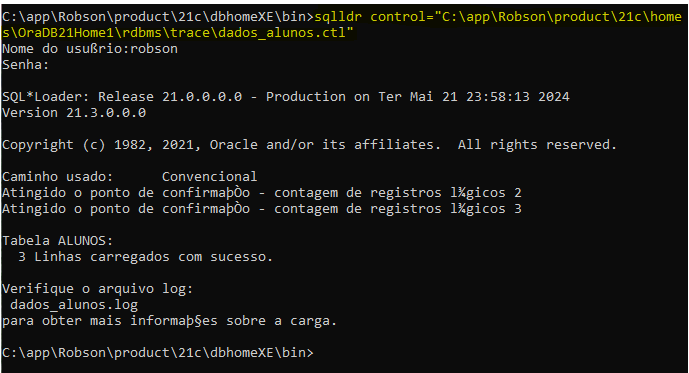